In [1]:
import numpy as np

In [2]:
# Hyper parameters
m = 2000
n = 2
lr = 0.001
epochs = 10000

In [3]:
def fun(X):
  # since the data is not standardized in the code, the coeffecients are taken 
  # in the range (0, 1)
  return 41 * ( X ** 2) / 53 +  11 * X / 19 + 17 / 23

In [4]:
def create_dataset():
    X = np.random.rand(m, 1)
    X2 = X * X

    Y = fun(X)

    arr = []
    arr.append(X2)
    arr.append(X)

    arr = np.array(arr)
    return arr.reshape((n,m)), Y.reshape((1,m))

In [5]:
x, y = create_dataset()
# x = x.reshape((n, m))
# y = y.reshape((1, m))

In [6]:
w = np.random.rand(n, 1)
b = np.random.rand(1)

In [7]:
def predict(train, weight, bias):
  return np.dot(weight.transpose(), train) + bias

In [8]:
def loss(y, y_hat):
  return np.sum((np.abs(y-y_hat) ** 4)) / m

In [9]:
def derivative(y, y_hat):
  return 4 * ((y_hat - y) ** 3)

In [10]:
losses = []
for i in range(epochs):
  # forward prop
  y_hat = predict(x, w, b)

  # derivative for backprop
  dz =  derivative(y, y_hat)

  # printing loss every 50 epochs
  if i % 500 == 0:
    losses.append(loss(y, y_hat))
    print("Loss at epoch " + str(i+1) + " is " + str(loss(y, y_hat)))

  dw = np.dot(x, dz.transpose()) / m
  db = np.sum(dz) / m

  w -= lr * dw
  b -= lr * db

Loss at epoch 1 is 0.14279225818617067
Loss at epoch 501 is 0.013658866970456006
Loss at epoch 1001 is 0.004939873115945313
Loss at epoch 1501 is 0.002585805107238758
Loss at epoch 2001 is 0.001615852104931158
Loss at epoch 2501 is 0.001120484188146937
Loss at epoch 3001 is 0.000831964399916548
Loss at epoch 3501 is 0.000648261824792074
Loss at epoch 4001 is 0.0005235039083612989
Loss at epoch 4501 is 0.00043453068737233123
Loss at epoch 5001 is 0.0003685961527375895
Loss at epoch 5501 is 0.0003182009273394629
Loss at epoch 6001 is 0.0002786907345532589
Loss at epoch 6501 is 0.00024704814730816847
Loss at epoch 7001 is 0.00022124442379024492
Loss at epoch 7501 is 0.00019987286212303957
Loss at epoch 8001 is 0.00018193193538244089
Loss at epoch 8501 is 0.0001666920372792228
Loss at epoch 9001 is 0.00015361086172323014
Loss at epoch 9501 is 0.0001422780985633761


In [11]:
print(w)

[[0.23045514]
 [1.15720526]]


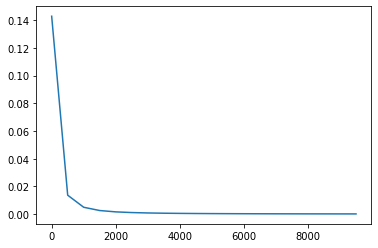

In [12]:
epocs_x = [i for i in range(1, epochs, 500)]
import matplotlib.pyplot as plt
plt.plot(epocs_x, losses)

In [13]:
# create test data for the model
test_x, test_y = create_dataset()

In [14]:
# Loss on test data
print("Loss on test data is : " + str(loss(test_y, predict(test_x, w, b))))

Loss on test data is : 0.0001319159798506644


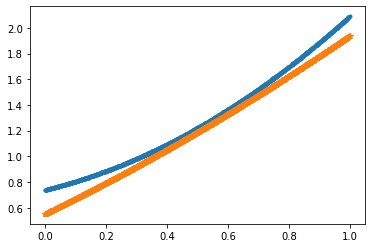

In [15]:
# Plotting the ground truth values vs model predicted values
# Yellow line denotes the predictions, blue line denotes the ground truth
plt.plot(test_x[1], test_y.reshape(m), '.',
         test_x[1], predict(test_x, w, b).reshape(m), '*')